In [139]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [140]:
df = pd.read_csv("electric_vehicles_spec_2025.csv")

In [141]:
df.head()

brand                model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156       225   
1  Lithium-ion            192.0      235.0                   149       225   
2  Lithium-ion            102.0      345.0                   158       280   
3  Lithium-ion            102.0      345.0                   158       280   
4  Lithium-ion              NaN      310.0                   156       315   

   acceleration_0_100_s  ...  towing_capacity_kg cargo_volume_l  seats  \
0                   7.0  ...                 0.0            185      4   
1                   7.0  ...                 0.0            185      4   
2                   5.9  ...                 0.0            360      5   
3                   6.2  ...                 0.0            360      5   
4                   7.5  ...                 NaN            496      5   

  drivetrain       segment length_mm width_mm  height_mm  car_body_type  \
0        FWD   B - Compact      3673     1683       1518      Hatchback   
1        FWD   B - Compact      3673     1683       1518      Hatchback   
2        FWD  JB - Compact      4187     1779       1557            SUV   
3        FWD  JB - Compact      4187     1779       1557            SUV   
4        FWD   JC - Medium      4680     1865       1700            SUV   

                                          source_url  
0  https://ev-database.org/car/1904/Abarth-500e-C...  
1  https://ev-database.org/car/1903/Abarth-500e-H...  
2  https://ev-database.org/car/3057/Abarth-600e-S...  
3  https://ev-database.org/car/3056/Abarth-600e-T...  
4         https://ev-database.org/car/1678/Aiways-U5  

[5 rows x 22 columns]

In [142]:
df.shape


(478, 22)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [144]:
df["cargo_volume_l"].unique()

array(['185', '360', '496', '472', '400', '326', '502', '520', '535',
       '526', '511', '10 Banana Boxes', '514', '350', '405', '470', '490',
       '570', '500', '525', '440', '345', '308', '552', '235', '385',
       '540', '793', '775', '1050', '310', '460', '380', '510', '603',
       '989', '390', '620', '467', '361', '572', '536', '519', '523', nan,
       '672', '228', '333', '354', '432', '503', '438', '280', '480',
       '401', '338', '466', '505', '355', '550', '839', '435', '475',
       '309', '210', '522', '316', '611', '509', '456', '410', '249',
       '363', '479', '453', '448', '151', '270', '31 Banana Boxes', '340',
       '495', '430', '645', '13 Banana Boxes', '828', '551', '1410',
       '1030', '555', '1390', '990', '300', '200', '579', '265', '386',
       '450', '468', '415', '819', '352', '516', '267', '434', '588',
       '412', '608', '471', '348', '407', '484', '446', '366', '367',
       '420', '950', '545', '585', '313', '323', '370', '630', '441',
   

In [145]:
df["cargo_volume_l"]=pd.to_numeric(df["cargo_volume_l"],errors="coerce")

In [146]:
df['cargo_volume_l'].dtype

dtype('float64')

In [147]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 4
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [148]:
df.describe()

top_speed_kmh  battery_capacity_kWh  number_of_cells    torque_nm  \
count     478.000000            478.000000       276.000000   471.000000   
mean      185.487448             74.043724       485.293478   498.012739   
std        34.252773             20.331058      1210.819733   241.461128   
min       125.000000             21.300000        72.000000   113.000000   
25%       160.000000             60.000000       150.000000   305.000000   
50%       180.000000             76.150000       216.000000   430.000000   
75%       201.000000             90.600000       324.000000   679.000000   
max       325.000000            118.000000      7920.000000  1350.000000   

       efficiency_wh_per_km    range_km  acceleration_0_100_s  \
count            478.000000  478.000000            478.000000   
mean             162.903766  393.179916              6.882636   
std               34.317532  103.287335              2.730696   
min              109.000000  135.000000              2.200000   
25%              143.000000  320.000000              4.800000   
50%              155.000000  397.500000              6.600000   
75%              177.750000  470.000000              8.200000   
max              370.000000  685.000000             19.100000   

       fast_charging_power_kw_dc  towing_capacity_kg  cargo_volume_l  \
count                 477.000000          452.000000      474.000000   
mean                  125.008386         1052.261062      493.860759   
std                    58.205012          737.851774      187.005674   
min                    29.000000            0.000000      151.000000   
25%                    80.000000          500.000000      385.000000   
50%                   113.000000         1000.000000      470.000000   
75%                   150.000000         1600.000000      544.500000   
max                   281.000000         2500.000000     1410.000000   

            seats    length_mm     width_mm    height_mm  
count  478.000000   478.000000   478.000000   478.000000  
mean     5.263598  4678.506276  1887.359833  1601.125523  
std      1.003961   369.210573    73.656807   130.754851  
min      2.000000  3620.000000  1610.000000  1329.000000  
25%      5.000000  4440.000000  1849.000000  1514.000000  
50%      5.000000  4720.000000  1890.000000  1596.000000  
75%      5.000000  4961.000000  1939.000000  1665.000000  
max      9.000000  5908.000000  2080.000000  1986.000000

In [149]:
# fill missing values in colums
df["number_of_cells"].fillna(df["number_of_cells"].median(), inplace=True)

In [150]:
df["towing_capacity_kg"].fillna(df["towing_capacity_kg"].median(), inplace=True)

In [151]:
df=df[df["model"].notna()]

In [152]:
df["torque_nm"].fillna(df["torque_nm"].median(), inplace=True)

In [153]:
df["cargo_volume_l"].fillna(df["cargo_volume_l"].median(), inplace=True)

In [154]:
df["fast_charging_power_kw_dc"].fillna(df["fast_charging_power_kw_dc"].median(), inplace=True)

In [155]:
df=df[df["fast_charge_port"].notna()]

In [156]:
df.isnull().sum()

brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
source_url                   0
dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476 entries, 0 to 476
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      476 non-null    object 
 1   model                      476 non-null    object 
 2   top_speed_kmh              476 non-null    int64  
 3   battery_capacity_kWh       476 non-null    float64
 4   battery_type               476 non-null    object 
 5   number_of_cells            476 non-null    float64
 6   torque_nm                  476 non-null    float64
 7   efficiency_wh_per_km       476 non-null    int64  
 8   range_km                   476 non-null    int64  
 9   acceleration_0_100_s       476 non-null    float64
 10  fast_charging_power_kw_dc  476 non-null    float64
 11  fast_charge_port           476 non-null    object 
 12  towing_capacity_kg         476 non-null    float64
 13  cargo_volume_l             476 non-null    float64
 14 

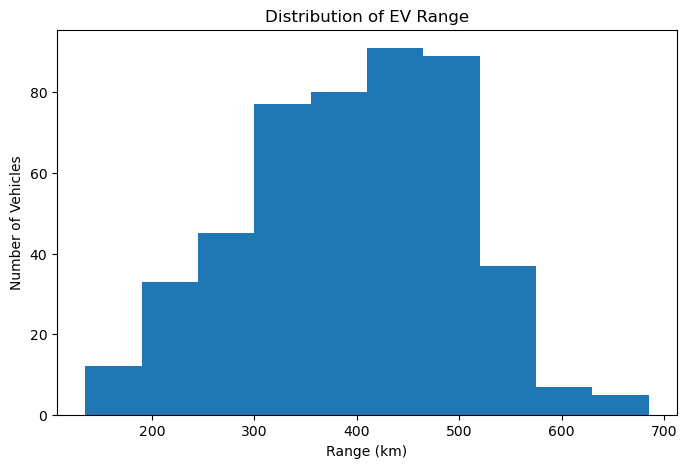

In [158]:
#histogram of range_km
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df['range_km'])
ax.set_title("Distribution of EV Range")
ax.set_xlabel("Range (km)")
ax.set_ylabel("Number of Vehicles")

plt.show()

In [159]:
df['range_km'].skew() 

-0.1636571201546916

Text(0.5, 1.0, 'Distribution of EV Range')

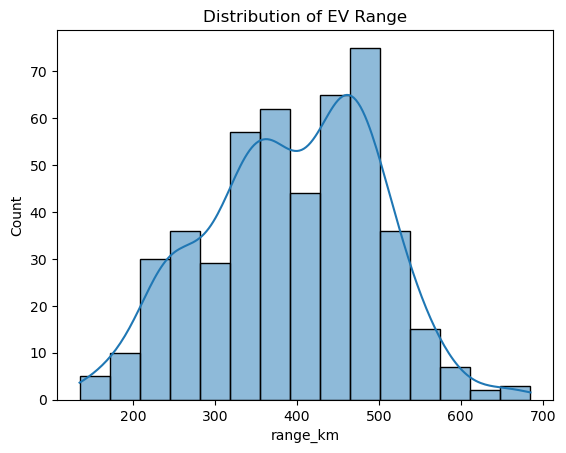

In [160]:
sns.histplot(df["range_km"], kde=True)
plt.title("Distribution of EV Range") #EV-electric vehicle

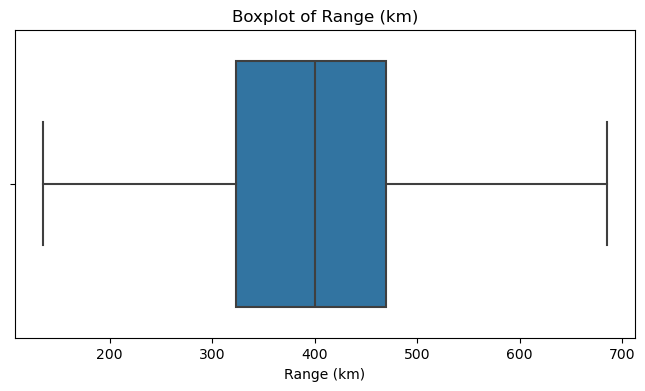

In [161]:
#boxplot for the Range column
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='range_km')  
plt.title("Boxplot of Range (km)")
plt.xlabel("Range (km)")
plt.show()

In [162]:
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

In [163]:
#function to plot box plots for numeric columns
def show_plots(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot for {col}')
            plt.xlabel(col)
            plt.tight_layout()
            plt.show()


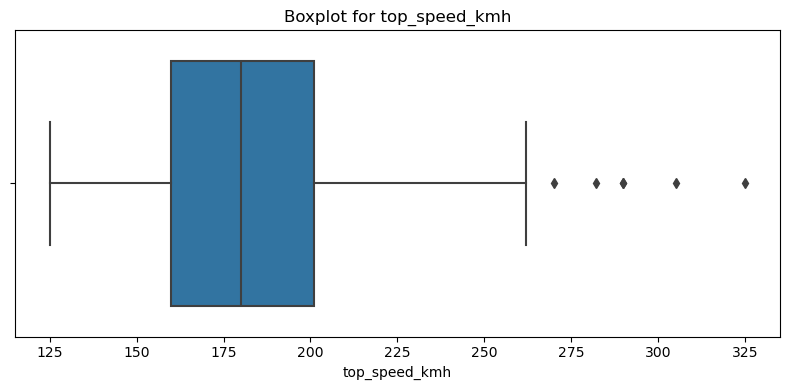

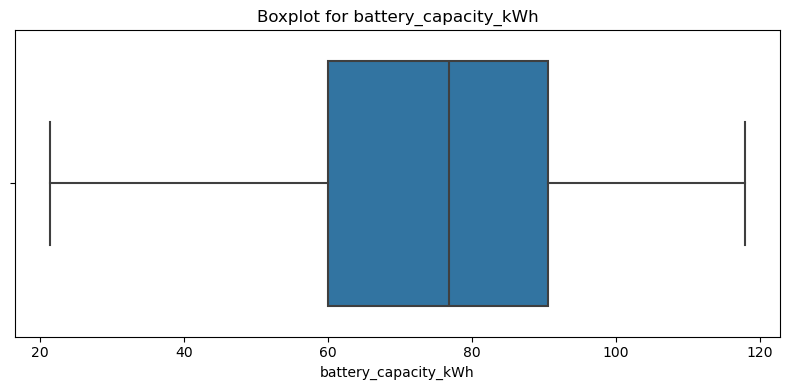

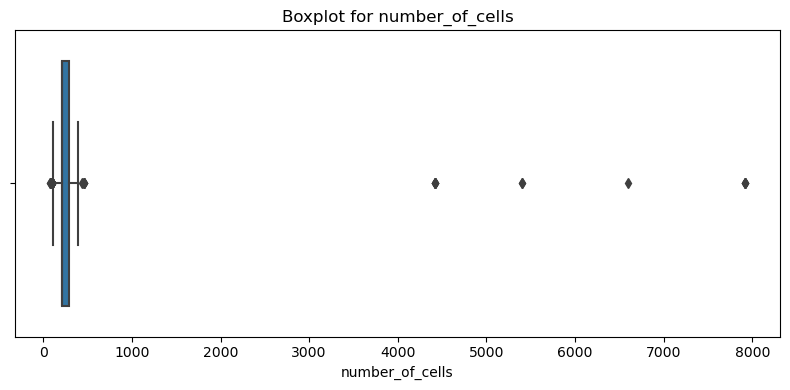

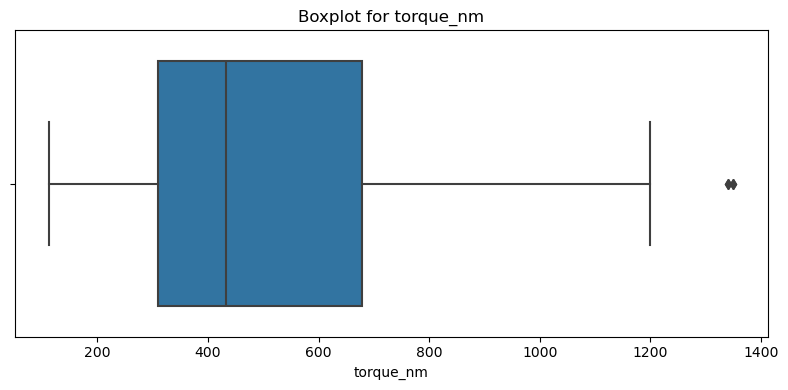

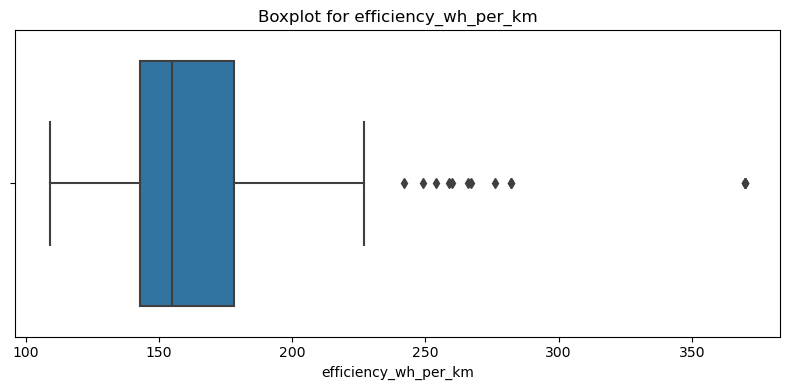

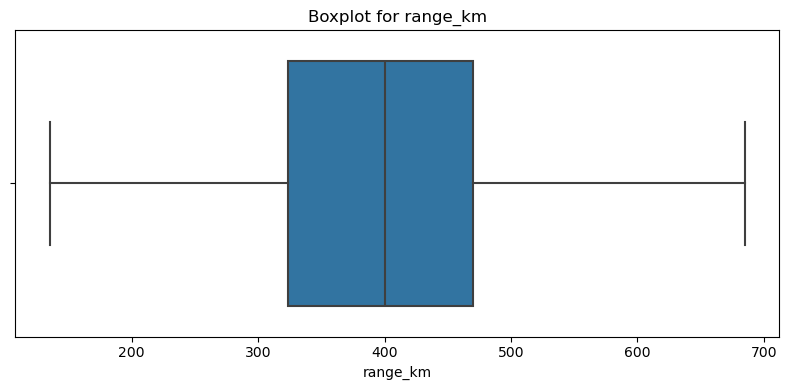

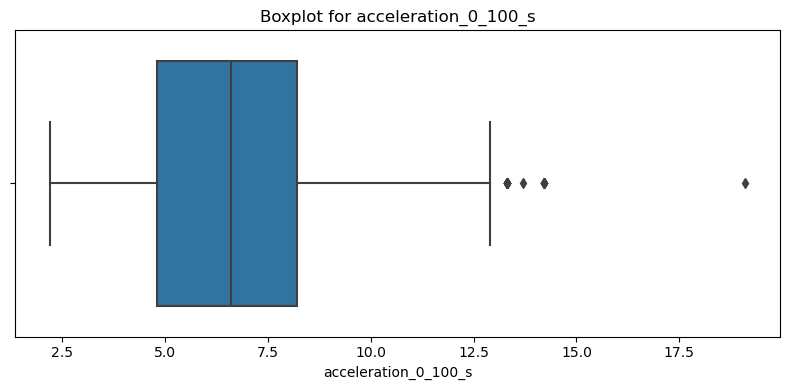

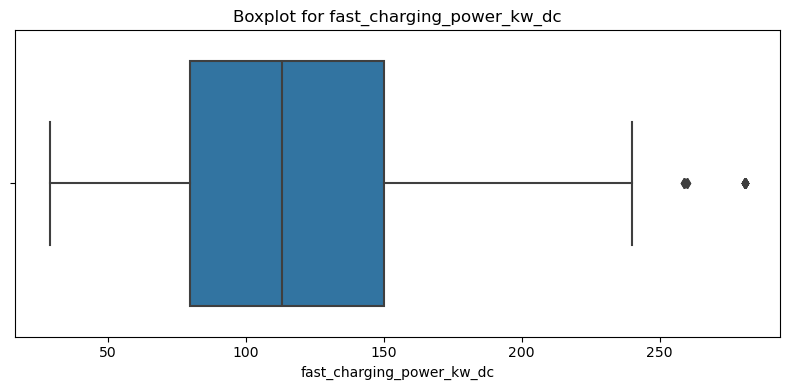

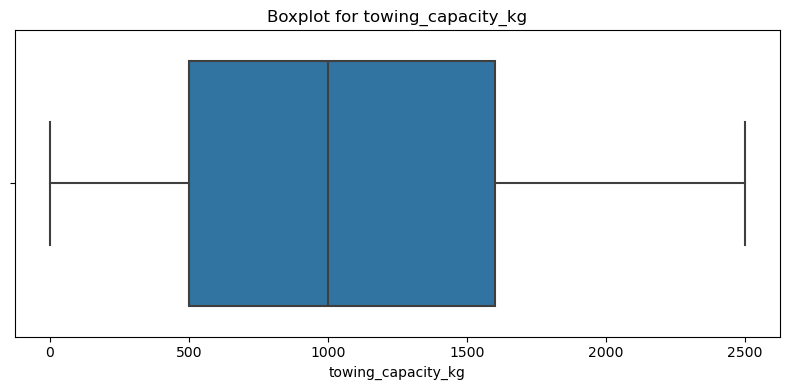

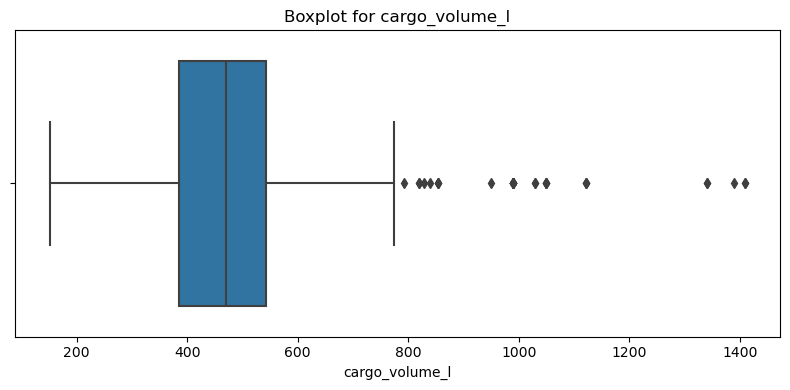

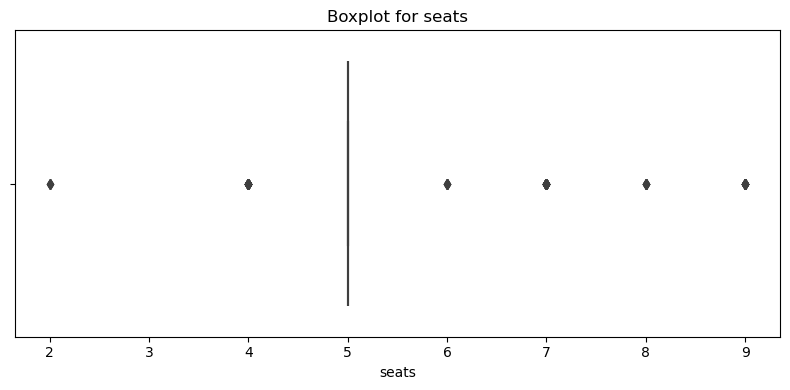

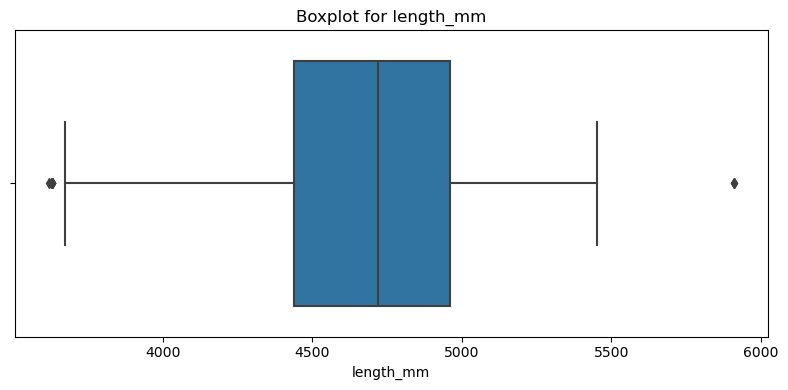

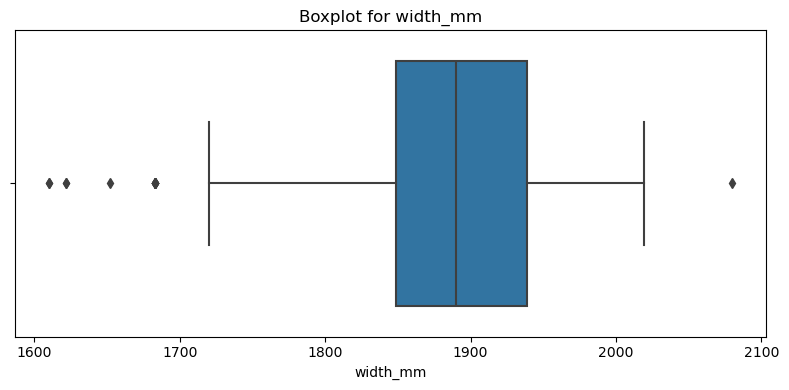

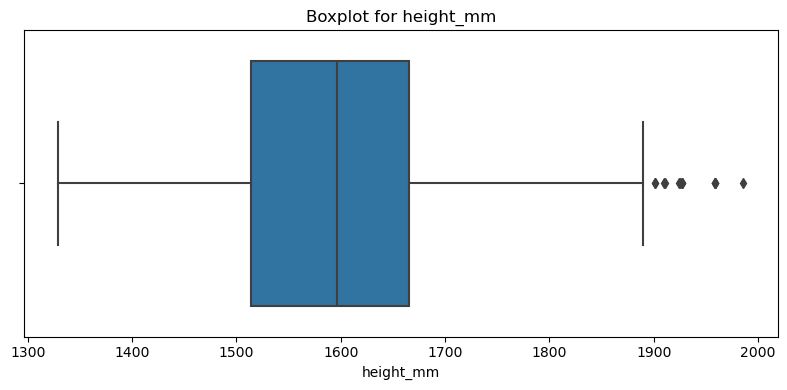

In [164]:
show_plots(df)

In [165]:
#function to plot histogram for numeric columns
def show_histograms(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(8, 4))
            plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()


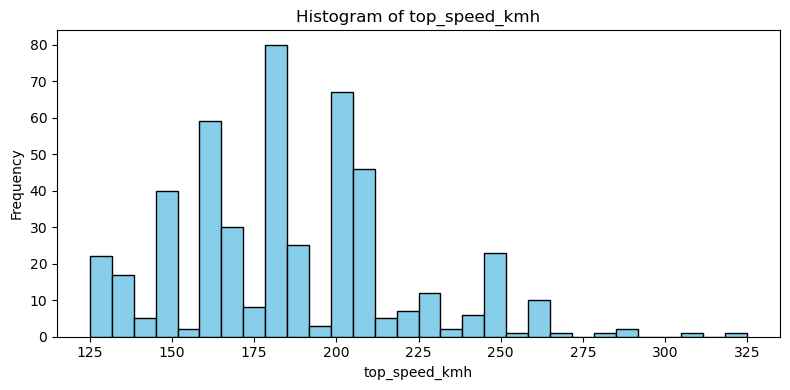

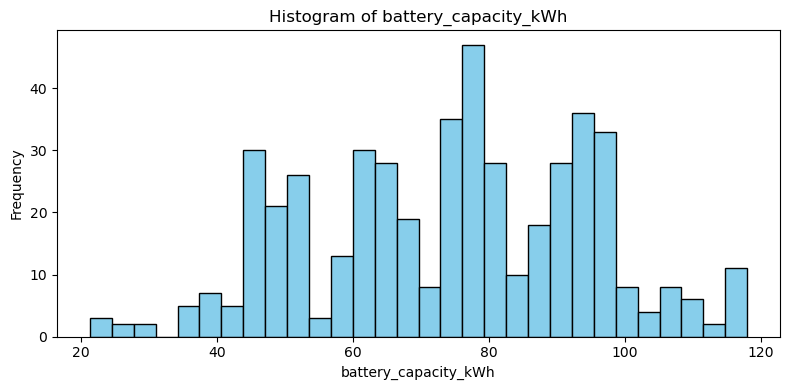

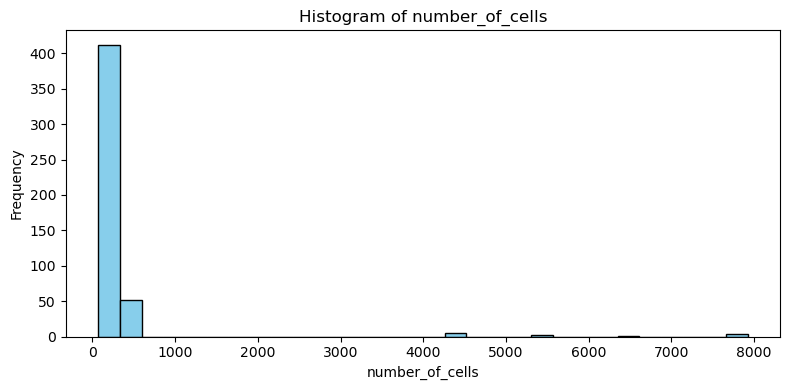

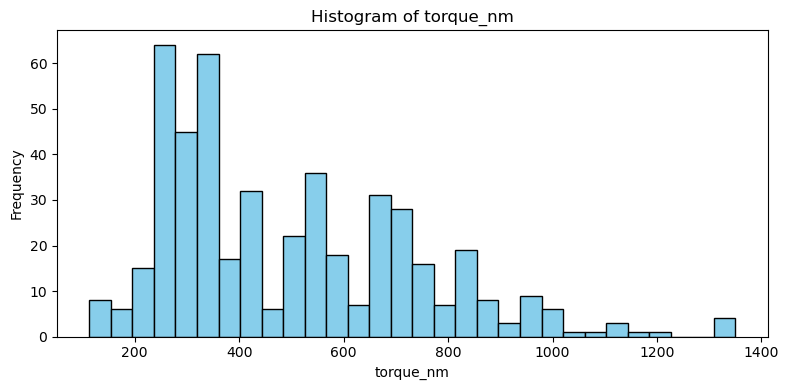

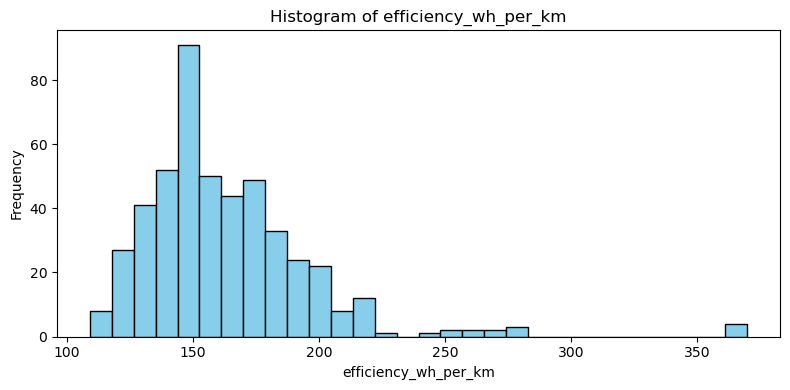

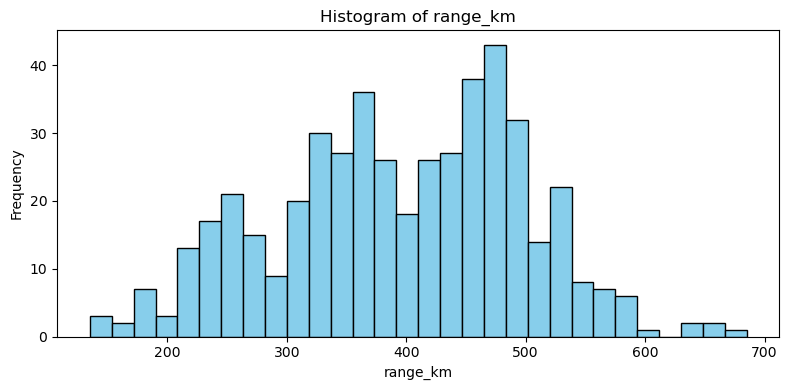

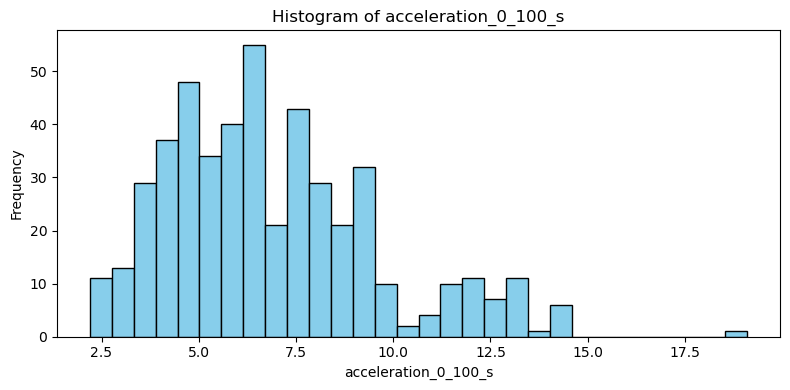

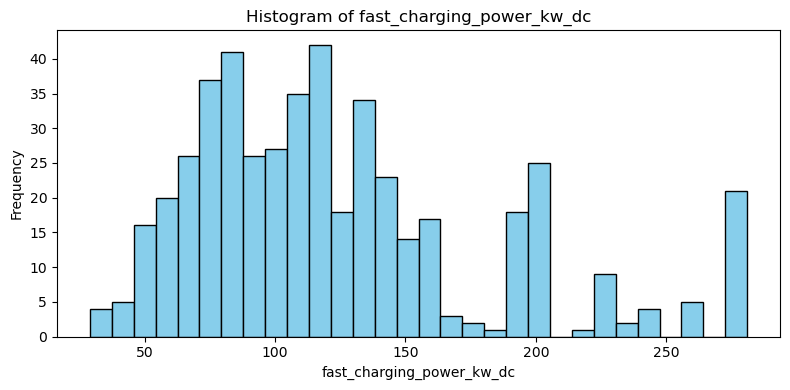

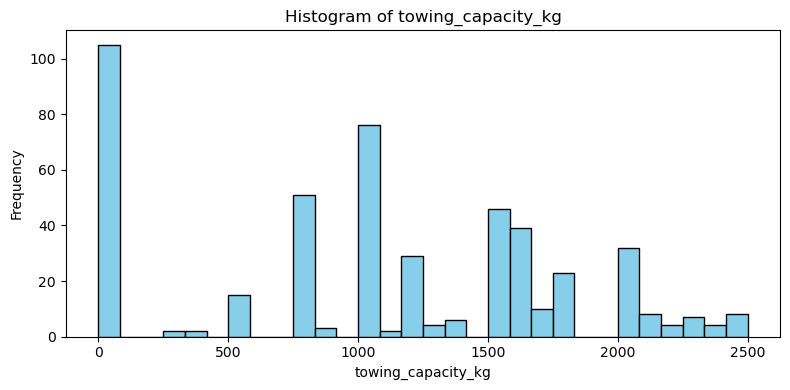

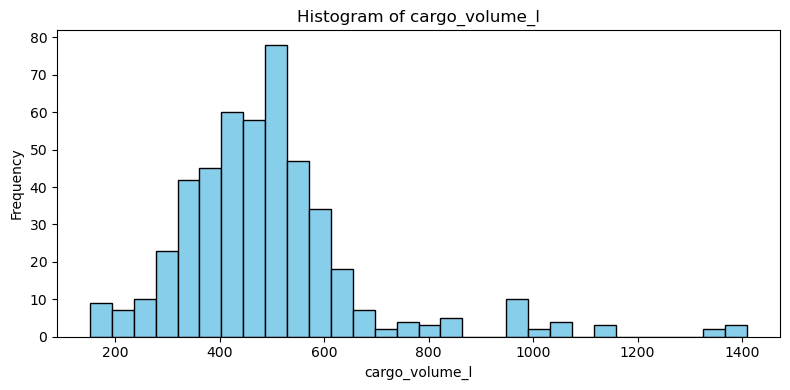

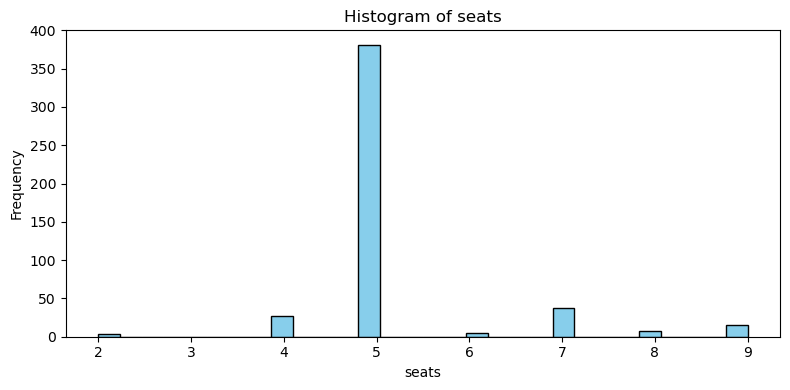

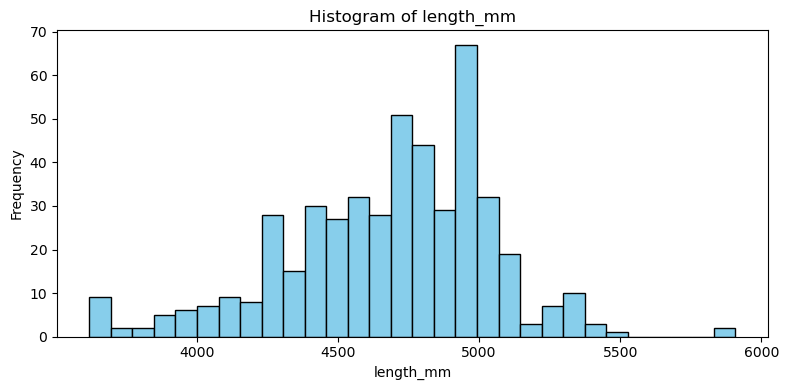

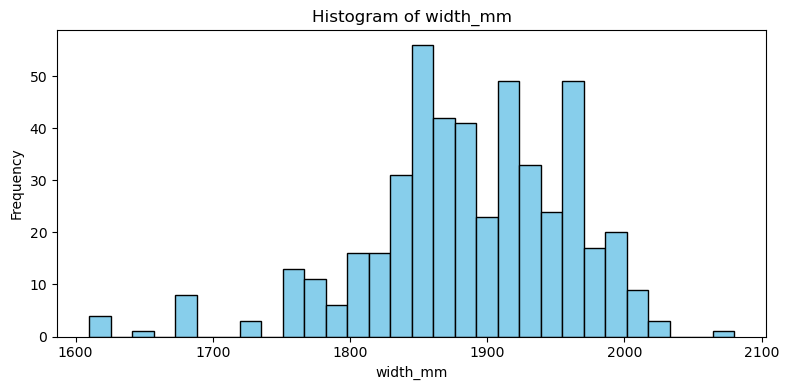

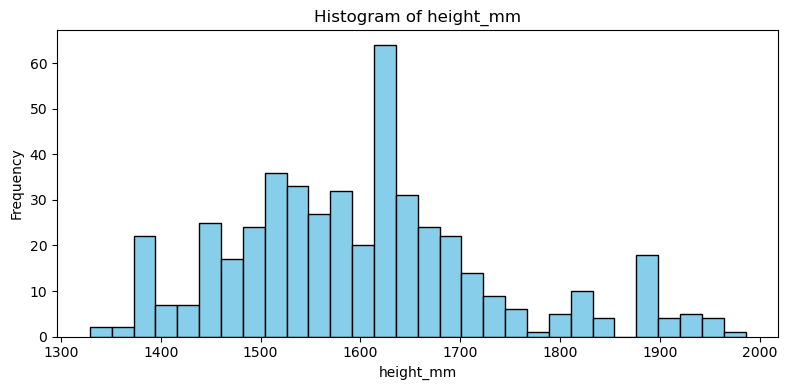

In [166]:
show_histograms(df)

In [167]:
#what brands have the longest range?
#group by brand and calculate max, then sort
brand_max_range= df.groupby("brand")["range_km"].max().sort_values(ascending=False)
brand_max_range.head(10)

brand
Mercedes-Benz    685
Lucid            665
Audi             610
Tesla            575
Porsche          575
DS               545
Volvo            530
Polestar         530
Volkswagen       525
BMW              525
Name: range_km, dtype: int64

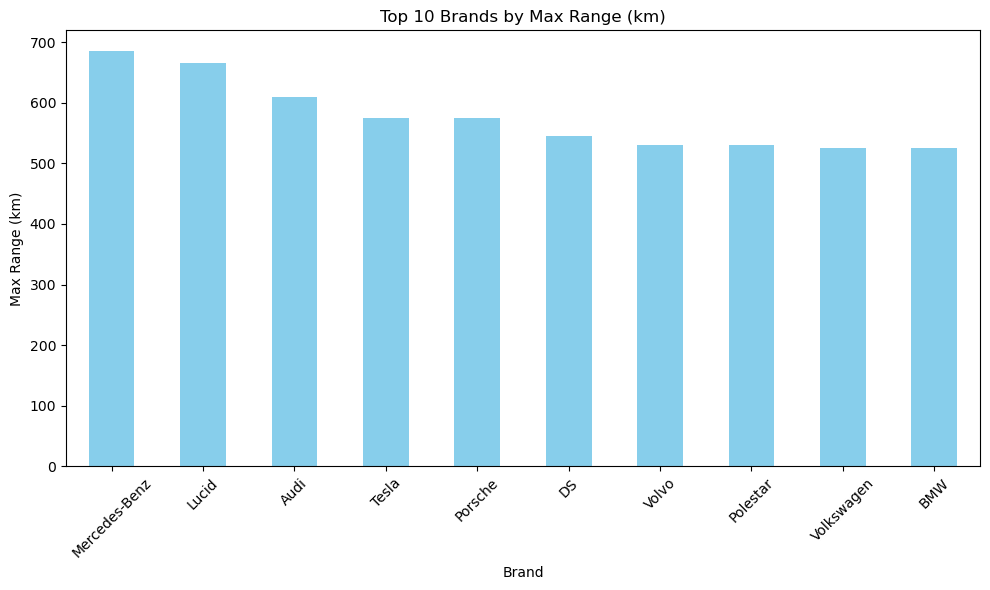

In [168]:
#bar plot for top 10 brands by max range

brand_max_range.head(10).plot(kind="bar", figsize=(10, 6), color='Skyblue')

plt.title("Top 10 Brands by Max Range (km)")
plt.ylabel("Max Range (km)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [169]:
df.columns


Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

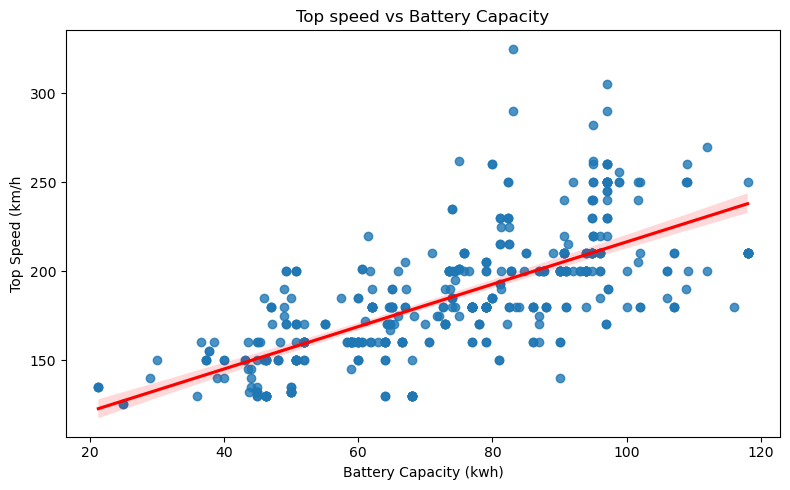

In [170]:
# does battery size relate to speed?
# scatter plot with trend
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='battery_capacity_kWh', y='top_speed_kmh', line_kws={"color": "red"})
plt.title("Top speed vs Battery Capacity")
plt.xlabel("Battery Capacity (kwh)")
plt.ylabel("Top Speed (km/h")
plt.tight_layout()
plt.show()

In [171]:
#check the correlation number,> 0.5 = strong positive relationship, 0.3–0.5 = moderate, < 0.3 = weak

corr=df["battery_capacity_kWh"].corr(df["top_speed_kmh"])
print(f"Correlation: {corr:.2f}")

Correlation: 0.71


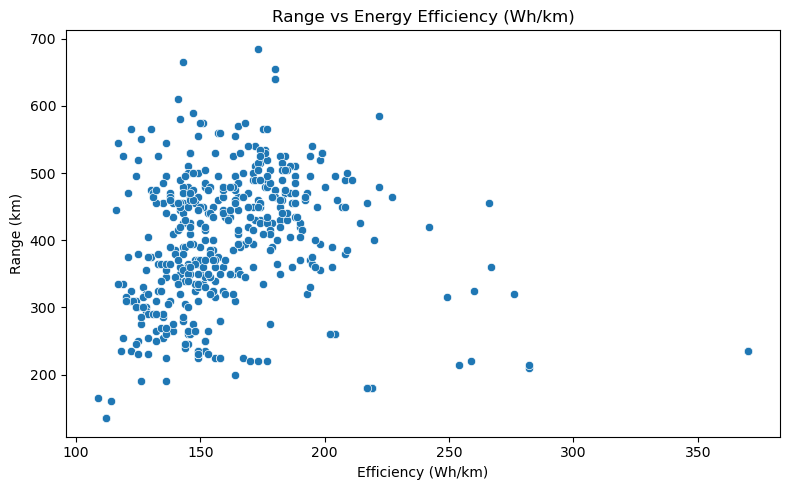

In [172]:
#How does a car's energy efficiency affect its driving range?
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="efficiency_wh_per_km", y="range_km")

plt.title("Range vs Energy Efficiency (Wh/km)")
plt.xlabel("Efficiency (Wh/km)")
plt.ylabel("Range (km)")
plt.tight_layout()
plt.show()

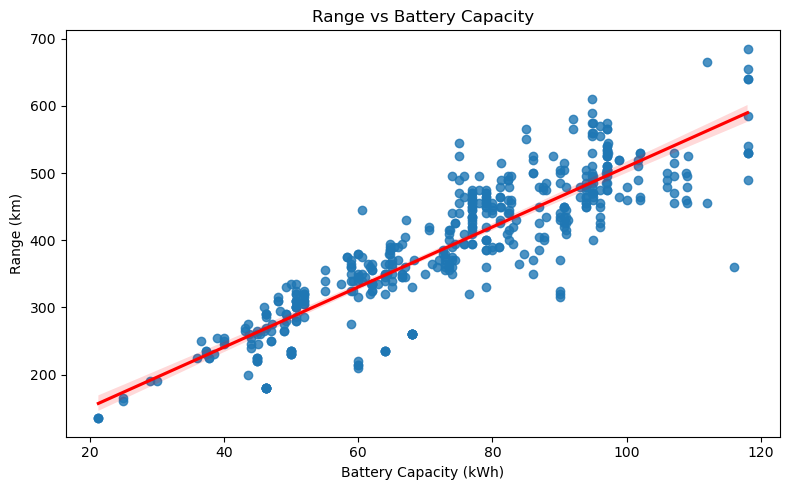

In [173]:
#how does battery capacity affect range?
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x="battery_capacity_kWh", y="range_km", line_kws={"color": "red"})

plt.title("Range vs Battery Capacity")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.tight_layout()
plt.show()


In [174]:
#check the correlation number,> 0.5 = strong positive relationship, 0.3–0.5 = moderate, < 0.3 = weak
corr = df["battery_capacity_kWh"].corr(df["range_km"])
print(f"Correlation: {corr:.2f}")


Correlation: 0.88


In [175]:
#Do AWD (All-Wheel Drive) cars generally have faster acceleration (lower 0–100 km/h time) than FWD (Front-Wheel Drive) cars?
#comparing mean acceleration times by drive train
df.groupby("drivetrain")["acceleration_0_100_s"].mean()

drivetrain
AWD    4.553927
FWD    9.715484
RWD    6.877692
Name: acceleration_0_100_s, dtype: float64

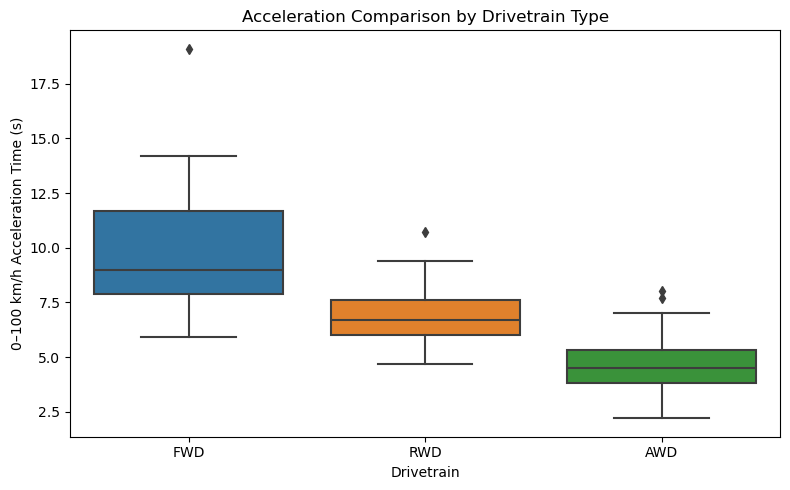

In [176]:
# boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="drivetrain", y="acceleration_0_100_s")
plt.title("Acceleration Comparison by Drivetrain Type")
plt.xlabel("Drivetrain")
plt.ylabel("0–100 km/h Acceleration Time (s)")
plt.tight_layout()
plt.show()


In [177]:
df.columns


Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

build model

In [178]:
df.select_dtypes("object").head()

brand                model battery_type fast_charge_port drivetrain  \
0  Abarth     500e Convertible  Lithium-ion              CCS        FWD   
1  Abarth       500e Hatchback  Lithium-ion              CCS        FWD   
2  Abarth  600e Scorpionissima  Lithium-ion              CCS        FWD   
3  Abarth         600e Turismo  Lithium-ion              CCS        FWD   
4  Aiways                   U5  Lithium-ion              CCS        FWD   

        segment car_body_type  \
0   B - Compact     Hatchback   
1   B - Compact     Hatchback   
2  JB - Compact           SUV   
3  JB - Compact           SUV   
4   JC - Medium           SUV   

                                          source_url  
0  https://ev-database.org/car/1904/Abarth-500e-C...  
1  https://ev-database.org/car/1903/Abarth-500e-H...  
2  https://ev-database.org/car/3057/Abarth-600e-S...  
3  https://ev-database.org/car/3056/Abarth-600e-T...  
4         https://ev-database.org/car/1678/Aiways-U5

In [179]:
df.select_dtypes("object").nunique()

brand                58
model               476
battery_type          1
fast_charge_port      2
drivetrain            3
segment              15
car_body_type         8
source_url          476
dtype: int64

In [180]:
#drop low and high cardinality categorical variables
df.drop(columns=["model","battery_type","fast_charge_port", "drivetrain","source_url" ],inplace=True)


In [181]:
df.columns

Index(['brand', 'top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells',
       'torque_nm', 'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'cargo_volume_l',
       'seats', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type'],
      dtype='object')

In [182]:
#drop leaky column
df.drop(columns="efficiency_wh_per_km", inplace=True)

In [183]:
corr_matrix=df.select_dtypes("number").drop(columns="range_km").corr().abs()
corr_matrix

top_speed_kmh  battery_capacity_kWh  \
top_speed_kmh                   1.000000              0.706024   
battery_capacity_kWh            0.706024              1.000000   
number_of_cells                 0.278460              0.150081   
torque_nm                       0.776853              0.745860   
acceleration_0_100_s            0.822493              0.641756   
fast_charging_power_kw_dc       0.771293              0.727374   
towing_capacity_kg              0.215486              0.436970   
cargo_volume_l                  0.164717              0.116494   
seats                           0.318327              0.011663   
length_mm                       0.437894              0.685197   
width_mm                        0.534844              0.732666   
height_mm                       0.468616              0.060569   

                           number_of_cells  torque_nm  acceleration_0_100_s  \
top_speed_kmh                     0.278460   0.776853              0.822493   
battery_capacity_kWh              0.150081   0.745860              0.641756   
number_of_cells                   1.000000   0.050755              0.201413   
torque_nm                         0.050755   1.000000              0.773498   
acceleration_0_100_s              0.201413   0.773498              1.000000   
fast_charging_power_kw_dc         0.085530   0.652950              0.628412   
towing_capacity_kg                0.031299   0.326225              0.275177   
cargo_volume_l                    0.079959   0.041699              0.294774   
seats                             0.038005   0.164658              0.444460   
length_mm                         0.129668   0.498404              0.248131   
width_mm                          0.156699   0.561271              0.393612   
height_mm                         0.112948   0.195184              0.500911   

                           fast_charging_power_kw_dc  towing_capacity_kg  \
top_speed_kmh                               0.771293            0.215486   
battery_capacity_kWh                        0.727374            0.436970   
number_of_cells                             0.085530            0.031299   
torque_nm                                   0.652950            0.326225   
acceleration_0_100_s                        0.628412            0.275177   
fast_charging_power_kw_dc                   1.000000            0.230310   
towing_capacity_kg                          0.230310            1.000000   
cargo_volume_l                              0.018542            0.149414   
seats                                       0.128840            0.147842   
length_mm                                   0.472278            0.383367   
width_mm                                    0.574982            0.443583   
height_mm                                   0.291474            0.292181   

                           cargo_volume_l     seats  length_mm  width_mm  \
top_speed_kmh                    0.164717  0.318327   0.437894  0.534844   
battery_capacity_kWh             0.116494  0.011663   0.685197  0.732666   
number_of_cells                  0.079959  0.038005   0.129668  0.156699   
torque_nm                        0.041699  0.164658   0.498404  0.561271   
acceleration_0_100_s             0.294774  0.444460   0.248131  0.393612   
fast_charging_power_kw_dc        0.018542  0.128840   0.472278  0.574982   
towing_capacity_kg               0.149414  0.147842   0.383367  0.443583   
cargo_volume_l                   1.000000  0.505866   0.481921  0.399401   
seats                            0.505866  1.000000   0.459871  0.305378   
length_mm                        0.481921  0.459871   1.000000  0.852566   
width_mm                         0.399401  0.305378   0.852566  1.000000   
height_mm                        0.593575  0.697320   0.245817  0.227479   

                           height_mm  
top_speed_kmh               0.468616  
battery_capacity_kWh        0.060569  
number_of_cells             0.112948  
torque

In [184]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.85
high_corr = [column for column in upper.columns if any(upper[column] > 0.85)]

print("Highly correlated columns to consider dropping:", high_corr)


Highly correlated columns to consider dropping: ['width_mm']


In [185]:
corr_matrix['width_mm'].sort_values(ascending=False)


width_mm                     1.000000
length_mm                    0.852566
battery_capacity_kWh         0.732666
fast_charging_power_kw_dc    0.574982
torque_nm                    0.561271
top_speed_kmh                0.534844
towing_capacity_kg           0.443583
cargo_volume_l               0.399401
acceleration_0_100_s         0.393612
seats                        0.305378
height_mm                    0.227479
number_of_cells              0.156699
Name: width_mm, dtype: float64

In [186]:
df.drop(columns='width_mm', inplace=True)


<Axes: >

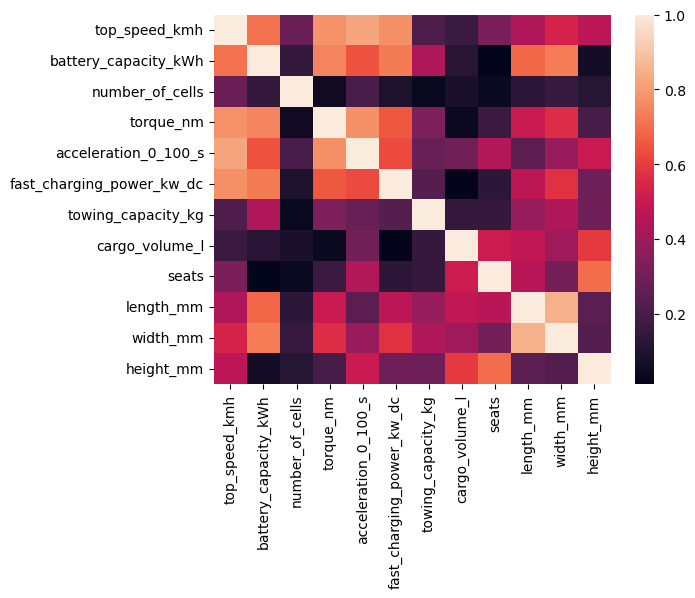

In [187]:
sns.heatmap(corr_matrix)

In [188]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [189]:
target="range_km"
features=['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells',
       'torque_nm','acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'cargo_volume_l',
       'seats','length_mm', 'height_mm',]


X_train=df_encoded[features]

y_train=df_encoded[target]

In [190]:
#do the splitting
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded[features], df_encoded[target], test_size=0.2, random_state=42
)


In [191]:
#baseline mean absolute error
y_mean=y_train.mean()
y_pred_baseline=[y_mean]*len(y_train)
print("mean range km:", round(y_mean, 2))
print("baseline Mae:", mean_absolute_error(y_train, y_pred_baseline))

mean range km: 393.97
baseline Mae: 85.23213296398892


In [126]:
#(Imputer=SimpleImputer(strategy='median')
#Imputer.fit(X_train)
#XT_train=Imputer.transform(X_train)
#pd.DataFrame(XT_train, columns=X_train.columns).info())

In [192]:
model = make_pipeline(
    Ridge()
)
model.fit(X_train, y_train)

Pipeline(steps=[('ridge', Ridge())])

In [193]:
#evaluate model
y_pred_training=model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train,y_pred_training))

Training MAE: 19.57513744040151


In [194]:
#evaluate on test set
y_pred_test = model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))


Test MAE: 21.85598993805189


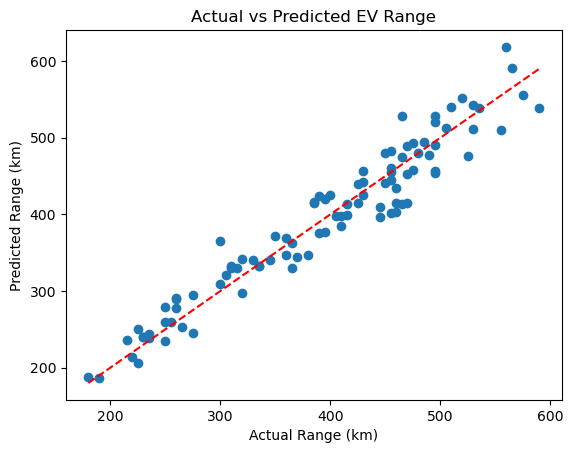

In [195]:
#scatter plot fot actual range vs predicted range in km
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Range (km)")
plt.ylabel("Predicted Range (km)")
plt.title("Actual vs Predicted EV Range")

plt.plot(
    [y_test.min(), y_test.max()], 
                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    [y_test.min(), y_test.max()], 
    'r--')
plt.show()
